<a href="https://colab.research.google.com/github/MoLo404Ko/python_grad/blob/master/_7_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#ЗАДАЧА: ОБУЧИТЬ МАШИНУ ПЕРЕВОДИТЬ ГРАДУСЫ ЦЕЛЬСИЯ В ГРАДУСЫ ФАРЕНГЕЙТА
#ФОРМУЛА: F = 1,8 * C + 32
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense

Обучающая выборка и эталонная, модель нейронной сети

In [14]:
c = np.array([-40, -10, 0, 8, 15, 22, 38])
f = np.array([-40, 14, 32, 46, 59, 72, 100])

#Модель SEQUENTIAL - модель последовательной многослойной нейронной сети,
#здесь бы ее создаем
model = keras.Sequential()

#Теперь добавляем слой нейронов в модель, за это отвечает Dense
#units - количество нейронов в слое
#input_shape - количество входов в нейрон
#activation - функция активации
model.add(Dense(units=1, input_shape=(1,), activation="linear"))

# Модель необходимо скомпилировать, когда происходит компиляция, модель распре-
# деляет случайные веса
# loss - критерий качества (средняя квадратная ошибка)
# Оптимизация алгоритма градиентного спуска Adam, (0.1) - шаг сходимости
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(0.1))

Обучение модели и график

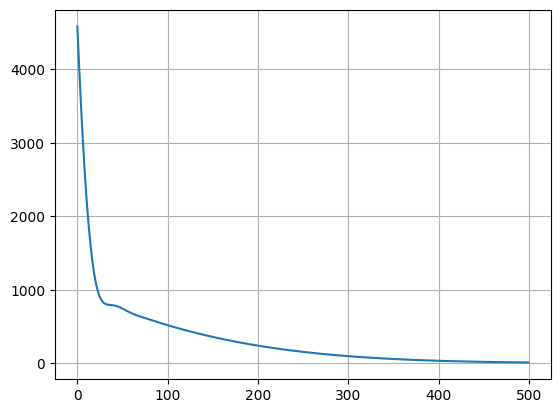

In [15]:
#fit - метод обучения модели
#c - наша обучающая выборка
#f - эталонная выборка
#epochs - количество иттераций обучения по выборкам
#verbose - вывод служебной инорфмации в консоль
history = model.fit(c,f, epochs=500, verbose=0)

# history - словарь, из которого мы достаем критерии качества для каждой эпохи
plt.plot(history.history["loss"])
plt.grid(True)
plt.show()

In [17]:
# Делаем проверку работы нейронной сети
print(model.predict([100,200,35, -1000, 200000]))

# Выведем веса. По формуле должны получить ~ 1,8 и 32
print(model.get_weights())

1/1 [==============================] - 0s 26ms/step
[[ 2.1130649e+02]
 [ 3.9378497e+02]
 [ 9.2695457e+01]
 [-1.7959570e+03]
 [ 3.6498581e+05]]
[array([[1.824785]], dtype=float32), array([28.827984], dtype=float32)]
